In [1]:
%matplotlib inline


# Plot Ridge coefficients as a function of the L2 regularization

.. currentmodule:: sklearn.linear_model

:class:`Ridge` Regression is the estimator used in this example.
Each color in the left plot represents one different dimension of the
coefficient vector, and this is displayed as a function of the
regularization parameter. The right plot shows how exact the solution
is. This example illustrates how a well defined solution is
found by Ridge regression and how regularization affects the
coefficients and their values. The plot on the right shows how
the difference of the coefficients from the estimator changes
as a function of regularization.

In this example the dependent variable Y is set as a function
of the input features: y = X*w + c. The coefficient vector w is
randomly sampled from a normal distribution, whereas the bias term c is
set to a constant.

As alpha tends toward zero the coefficients found by Ridge
regression stabilize towards the randomly sampled vector w.
For big alpha (strong regularisation) the coefficients
are smaller (eventually converging at 0) leading to a
simpler and biased solution.
These dependencies can be observed on the left plot.

The right plot shows the mean squared error between the
coefficients found by the model and the chosen vector w.
Less regularised models retrieve the exact
coefficients (error is equal to 0), stronger regularised
models increase the error.

Please note that in this example the data is non-noisy, hence
it is possible to extract the exact coefficients.


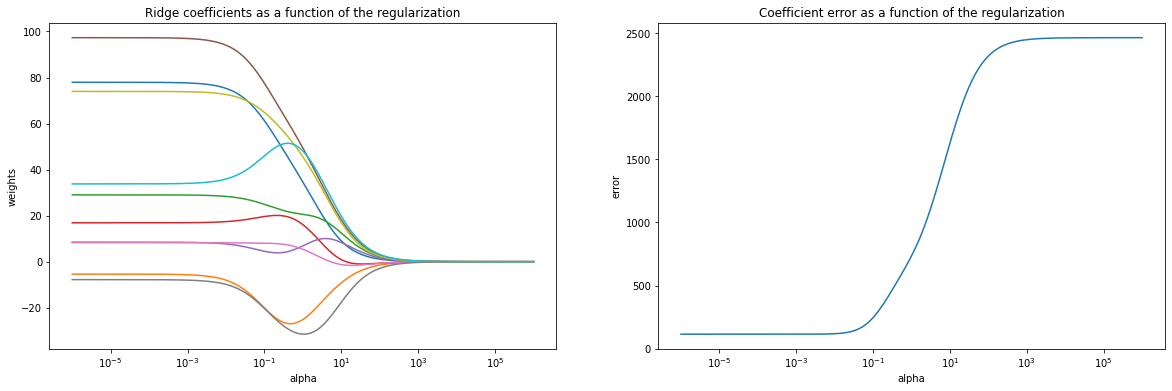

In [2]:
# Author: Kornel Kielczewski -- <kornel.k@plusnet.pl>

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

clf = Ridge()

X, y, w = make_regression(
    n_samples=10, n_features=10, coef=True, random_state=1, bias=3.5
)

coefs = []
errors = []

alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, w))

# Display results
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("error")
plt.title("Coefficient error as a function of the regularization")
plt.axis("tight")

plt.show()